# <CENTER>TOPIC MODELING</CENTER>

## ASSIGNMENT-7 03/13/2024


## IMPORTING AND READING CSV FILE

THIS CODE SNIPPET READS A CSV FILE USING THE PANDAS LIBRARY. THE FILE PATH IS SPECIFIED, AND ONCE THE FILE IS READ, THE FIRST 20 ROWS OF THE DATAFRAME ARE DISPLAYED.

In [1]:
import pandas as pd
file = "C:\\Users\\laxmi\\Desktop\\csv files\\Arts_Crafts_and_sewing_5.csv"
df = pd.read_csv(file)
df.head(20)


overall  verified      reviewerID        asin  \
0         4      True   AIE8N9U317ZBM   449819906   
1         5      True  A3ECOW0TWLH9V6   449819906   
2         4      True  A278N8QX9TY2OS   449819906   
3         5      True  A123W8HIK76XCN   449819906   
4         5      True  A2A6MZ2QB4AE0L   449819906   
5         5      True  A2OIU84NPVKIWN   449819906   
6         5      True   AKIV5VMRUZK1K   449819906   
7         4      True  A2BQ7YGPNCQSO4   449819906   
8         5      True  A2JNO9OR8FGNR4   449819906   
9         5      True  A1IFF9F3XA9X1I   449819906   
10        5      True  A3OI7AYBZ2BF1N  048625531X   
11        5      True  A1EWCPZ3FKLGLL  048625531X   
12        5      True  A3GEAE5YCV87KR  048625531X   
13        5      True  A304F5HPIBLUX2  048625531X   
14        5      True  A2F29ZE6OSBCUZ  048625531X   
15        2      True   AC0J24YW9X2FO   486473082   
16        5      True  A1FDXY51VC0UH0   486473082   
17        4      True  A1NTCDCKM4Y92P   486473082   
18        5      True  A3ONWA3EG24NGH   486473082   
19        5      True   ATHCXVSBRNZNW   715329278   

                                           reviewText  \
0                 Contains some interesting stitches.   
1   I'm a fairly experienced knitter of the one-co...   
2   Great book but the index is terrible. Had to w...   
3   I purchased the Kindle edition which is incred...   
4   Very well laid out and very easy to read.\n\nT...   
5   Beginning her career as a freelance knitter, M...   
6   This is a terrific stitch handbook (and I have...   
7   The book needs to be coil bound. The content i...   
8   I really am enjoying this book! I like the siz...   
9   Just received this book and looked over it cov...   
10  Son and grandson and I do these together.  Nic...   
11  This book is the perfect size to carry in your...   
12  Great value for such a little book. I brought ...   
13                                     great for kids   
14  Fun and simple. Easy to carry around for a bor...   
15  Not easy to follow.  Not enough patterns and n...   
16  I knit a great deal and saw this book in it's ...   
17  If I had known that this book had two differen...   
18  When I first saw this book years ago, I loved ...   
19  This magazine has been on my wish for awhile a...   

                                              summary  
0                                          Four Stars  
1     My current favorite go-to guide for inspiration  
2   lots of great examples, good instructions, col...  
3               Another little gem by Melissa Leapman  
4                                  Very comprehensive  
5                Great Addition to Any Stitch Library  
6                                    Count on Melissa  
7                                           good book  
8                                          Excellent!  
9                        Great addition to my library  
10                               perfect for 7 yr old  
11  This book is the perfect size to carry in your...  
12                 Great value for such a little book  
13                                         Five Stars  
14                                         Five Stars  
15                                      Old and dated  
16                                          Wonderful  
17                         Different covers same book  
18                 Had been looking for this book....  
19                                  Beautiful designs

## TAKING COUPLE OF TEXTS

THE CODE PRINTS THE REPRESENTATION OF A SPECIFIC PORTION OF TEXT FROM TWO ROWS OF THE DATAFRAME. IT DISPLAYS THE FIRST 400 CHARACTERS OF THE "text" COLUMN FOR THE ROWS LOCATED AT INDEX 2666 AND 4726.

In [2]:
print(repr(df.iloc[2666]["reviewText"][0:400]))
print(repr(df.iloc[4726]["reviewText"][0:400]))


'Great for labeling my Muckboots.'
'This is a very nice seam ripper. The tip is small so it fits in tight spaces and very sharp so it cuts well.'


## SPLIT SPEECH INTO SENTENCE

THE CODE SPLITS THE TEXT IN THE "text" COLUMN OF THE DATAFRAME INTO PARAGRAPHS USING A REGULAR EXPRESSION THAT MATCHES A PERIOD FOLLOWED BY ZERO OR MORE WHITESPACE CHARACTERS AND A NEWLINE. IT THEN ADDS A NEW COLUMN "paragraphs" TO THE DATAFRAME TO STORE THE LIST OF PARAGRAPHS FOR EACH ROW, AND ANOTHER COLUMN "number_of_paragraphs" TO STORE THE COUNT OF PARAGRAPHS FOR EACH TEXT.

In [3]:
import re

# Fill NaN values with an empty string
df["reviewText"] = df["reviewText"].fillna("")

# Apply regular expression
df["paragraphs"] = df["reviewText"].map(lambda text: re.split(r'\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)


## IMPORTING TFIDF VECTORIZATION

THE CODE CONVERTS TEXT DATA INTO TF-IDF VECTORS USING SKLEARN'S TFIDFVECTORIZER, REMOVING STOPWORDS AND SETTING MINIMUM DOCUMENT FREQUENCY.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['reviewText'])
tfidf_text_vectors.shape



C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(494485, 21086)

## DATAFRAME OF SENTENCES

THE CODE FLATTENS THE PARAGRAPHS IN THE DATAFRAME, RETAINING THE ASSOCIATED YEARS, AND CREATES A NEW DATAFRAME WITH PARAGRAPHS AND THEIR CORRESPONDING YEARS.

In [5]:
# flatten the paragraphs keeping the overall
paragraph_df = pd.DataFrame([{ "reviewText": paragraph, "overall": overall } 
                               for paragraphs, overall in zip(df["paragraphs"], df["overall"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


reviewText  overall
0                Contains some interesting stitches.        4
1  I'm a fairly experienced knitter of the one-co...        5
2  This gives you enough classic stitches to sati...        5
3  This also does not frustrate me in the ways to...        5
4  Here, Leapman uses the symbols common in knitt...        5
5  This is concise but full of options, so I FIND...        5
6  While I do love browsing Barbara Walker's stit...        5
7  Until that happens, this is my new go-to for f...        5
8  This is not a great resource for traditional k...        5
9  Great book but the index is terrible. Had to w...        4

## TFIDF OF THE SENTENCES DF

THE CODE UTILIZES TFIDFVECTORIZER TO CONVERT TEXT PARAGRAPHS INTO TFIDF VECTORS, REMOVING STOPWORDS AND SETTING MINIMUM DOCUMENT FREQUENCY AND MAXIMUM DOCUMENT FREQUENCY. THE SHAPE OF THE RESULTING TFIDF VECTORS IS DISPLAYED.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["reviewText"])
tfidf_para_vectors.shape


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(550733, 21235)

## NON-NEGATIVE MATRIX FACTORIZATION

THE CODE UTILIZES NON-NEGATIVE MATRIX FACTORIZATION (NMF) TO DECOMPOSE THE TFIDF TEXT VECTORS INTO TWO MATRICES: W_TEXT_MATRIX AND H_TEXT_MATRIX. W_TEXT_MATRIX REPRESENTS THE DOCUMENT-TOPIC DISTRIBUTION, WHILE H_TEXT_MATRIX REPRESENTS THE TOPIC-TERM DISTRIBUTION.

In [7]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


## DISPLAYING TOPICS

THE FUNCTION DISPLAYS THE TOP WORDS FOR EACH TOPIC GENERATED BY THE NMF MODEL. IT CALCULATES THE RELATIVE IMPORTANCE OF EACH WORD IN THE TOPIC BASED ON THEIR WEIGHTS IN THE MODEL COMPONENTS. THE RESULTING TOP WORDS ARE PRINTED ALONG WITH THEIR RELATIVE IMPORTANCE IN PERCENTAGE.

In [8]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())



Topic 00
  great (59.36)
  price (5.17)
  quality (2.19)
  item (1.44)
  value (1.37)

Topic 01
  love (58.86)
  colors (1.26)
  color (1.20)
  yarn (0.94)
  thank (0.69)

Topic 02
  good (55.80)
  quality (8.69)
  price (5.31)
  value (1.62)
  buy (0.94)

Topic 03
  nice (51.46)
  quality (2.87)
  colors (1.47)
  set (1.33)
  price (1.26)

Topic 04
  works (52.21)
  fine (1.87)
  perfectly (1.43)
  described (1.31)
  advertised (1.11)

Topic 05
  perfect (43.35)
  size (2.13)
  needed (1.93)
  thank (1.82)
  project (1.48)

Topic 06
  product (47.23)
  described (2.68)
  fast (2.26)
  happy (1.64)
  shipping (1.60)

Topic 07
  use (1.81)
  easy (1.23)
  like (1.11)
  work (0.96)
  colors (0.73)

Topic 08
  excellent (47.87)
  quality (10.84)
  thank (3.57)
  price (2.31)
  fast (1.16)

Topic 09
  expected (37.75)
  described (7.87)
  exactly (7.37)
  thank (4.73)
  arrived (2.50)


## DISPLAYING TOPICS

In [9]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
  great (58.05)
  price (5.17)
  quality (2.15)
  item (1.40)
  value (1.37)

Topic 01
  love (57.82)
  colors (1.29)
  color (1.21)
  yarn (0.97)
  thank (0.62)

Topic 02
  good (54.22)
  quality (8.46)
  price (5.32)
  value (1.61)
  buy (0.95)

Topic 03
  nice (49.95)
  quality (2.82)
  colors (1.54)
  set (1.32)
  price (1.26)

Topic 04
  works (51.92)
  fine (1.91)
  perfectly (1.45)
  described (1.25)
  advertised (1.10)

Topic 05
  perfect (42.54)
  size (2.15)
  needed (1.90)
  thank (1.62)
  project (1.46)

Topic 06
  product (45.61)
  described (2.43)
  fast (2.11)
  happy (1.66)
  shipping (1.49)

Topic 07
  use (1.85)
  easy (1.25)
  like (1.13)
  work (0.97)
  colors (0.71)

Topic 08
  excellent (45.33)
  quality (11.61)
  thank (3.17)
  price (2.52)
  fast (1.10)

Topic 09
  expected (35.41)
  described (7.85)
  exactly (7.23)
  thank (6.32)
  arrived (2.46)


## SIZE OF TOPIC

THE CODE CALCULATES THE PERCENTAGE DISTRIBUTION OF DOCUMENTS ACROSS TOPICS IN THE NMF MODEL. IT SUMS THE WEIGHTS OF DOCUMENTS ACROSS TOPICS AND THEN DIVIDES EACH SUM BY THE TOTAL SUM OF ALL DOCUMENT WEIGHTS.

In [10]:

W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0


array([12.97221234, 11.10727209, 11.11096123,  8.64720226,  4.89995102,
        6.22898428,  7.91705933, 25.61945324,  5.34544571,  6.15145851])

## TOPIC SIZES

In [11]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([12.67178032, 10.85006313, 10.91257049,  8.4905914 ,  4.75877472,
        6.10258966,  7.99587882, 26.68737336,  5.28147497,  6.24890313])

## COUNT VECTORIZATION

THE CODE PERFORMS TOPIC MODELING USING LATENT DIRICHLET ALLOCATION (LDA) ON A SUBSET OF PARAGRAPHS. IT UTILIZES A COUNT VECTORIZER TO CONVERT TEXT INTO A MATRIX OF TOKEN COUNTS, THEN FITS THE LDA MODEL TO THIS MATRIX TO EXTRACT TOPIC-WORD DISTRIBUTIONS. THE NUMBER OF TOPICS IS SET TO 10, AND THE RANDOM STATE IS FIXED FOR REPRODUCIBILITY.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Reduce the size of the dataset (optional)
paragraph_df_subset = paragraph_df.sample(n=100)  # Adjust the sample size as needed

# Initialize CountVectorizer with English stop words
count_para_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)

# Fit and transform the CountVectorizer on the dataset
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["reviewText"])

# Initialize LatentDirichletAllocation with desired parameters
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Utilize multiple CPU cores

# Fit the LDA model to the CountVectorizer output
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)

# Get the topic-word distributions
H_lda_para_matrix = lda_para_model.components_


## BREAKING PARAGRAPHS TO WORDS

THE CODE UTILIZES NLTK TO OBTAIN ENGLISH STOPWORDS AND THEN APPLIES A COUNT VECTORIZER TO CONVERT TEXT DATA INTO A MATRIX OF TOKEN COUNTS.

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stopwords.words('english')  # Get English stopwords
count_para_vectorizer = CountVectorizer(stop_words=stop_words, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["reviewText"])
count_para_vectors.shape


(550733, 21384)

## LATENT DIRICHLET ALLOCATION

THE CODE UTILIZES SCIKIT-LEARN'S LatentDirichletAllocation TO PERFORM TOPIC MODELING ON THE COUNT VECTORS GENERATED EARLIER.

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


## DISPLAY TOPICS

In [15]:
# Assuming count_para_vectorizer is properly initialized and fitted
feature_names = count_para_vectorizer.get_feature_names_out()

# Then use the feature names with the display_topics function
display_topics(lda_para_model, feature_names)



Topic 00
  great (16.91)
  perfect (4.23)
  product (3.78)
  works (3.52)
  love (2.68)

Topic 01
  one (1.47)
  would (1.29)
  get (0.90)
  amazon (0.89)
  product (0.84)

Topic 02
  use (2.95)
  fabric (2.14)
  easy (2.01)
  cut (1.93)
  cutting (1.39)

Topic 03
  color (4.75)
  colors (4.41)
  yarn (3.06)
  beautiful (1.94)
  love (1.75)

Topic 04
  paper (2.71)
  use (2.13)
  glue (1.21)
  used (1.01)
  make (0.96)

Topic 05
  machine (2.56)
  thread (2.35)
  sewing (1.89)
  use (1.23)
  one (1.19)

Topic 06
  pencils (2.91)
  recommend (2.79)
  highly (2.30)
  set (1.83)
  well (1.73)

Topic 07
  paint (1.77)
  use (1.43)
  brush (1.16)
  water (1.01)
  brushes (1.00)

Topic 08
  needles (1.96)
  size (1.61)
  like (1.40)
  use (1.14)
  small (1.10)

Topic 09
  good (9.40)
  nice (6.25)
  quality (6.09)
  love (3.76)
  price (2.74)


## TOPIC SIZES

In [16]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([15.52736824,  9.92907957,  8.90904642,  8.83915067, 10.53411882,
        8.8289492 ,  5.6812463 ,  9.74270588,  9.08714947, 12.92118545])

## WORDCLOUDS

THE CODE DEFINES A FUNCTION `wordcloud_topics` TO GENERATE WORD CLOUDS FOR EACH TOPIC DERIVED FROM A TOPIC MODEL. THE WORD CLOUDS ARE GENERATED USING THE WORDS AND THEIR ASSOCIATED WEIGHTS IN THE TOPIC MODEL.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')


C:\Users\laxmi\AppData\Local\Temp\ipykernel_4368\3513515901.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## NMF WORDCLOUD

THE FUNCTION `wordcloud_topics` IS CALLED TO GENERATE WORD CLOUDS FOR EACH TOPIC DERIVED FROM THE NMF (NON-NEGATIVE MATRIX FACTORIZATION) TOPIC MODEL USING THE TF-IDF VECTORIZER'S FEATURE NAMES.

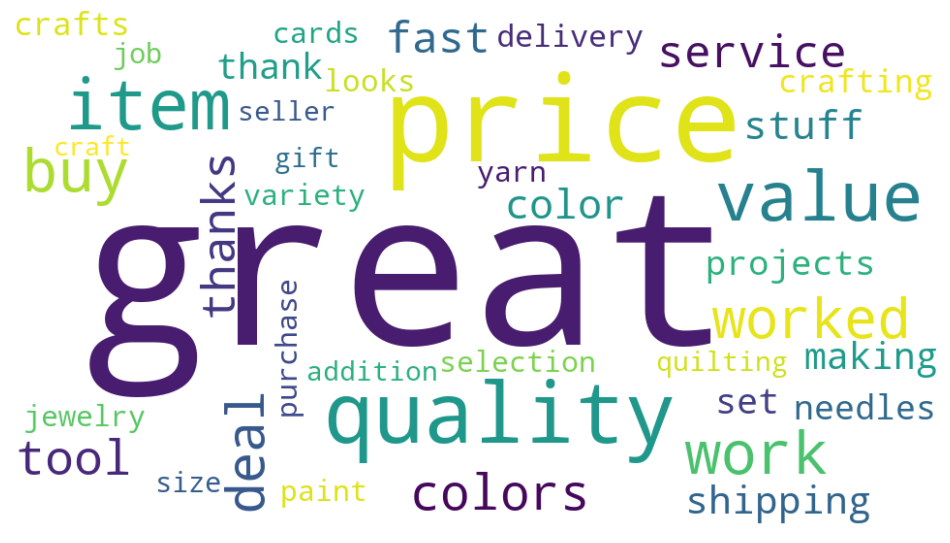

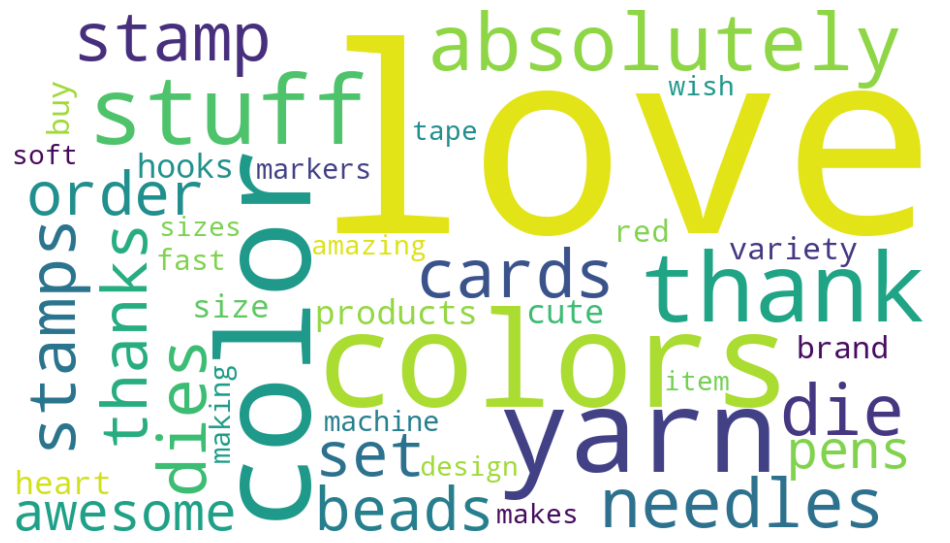

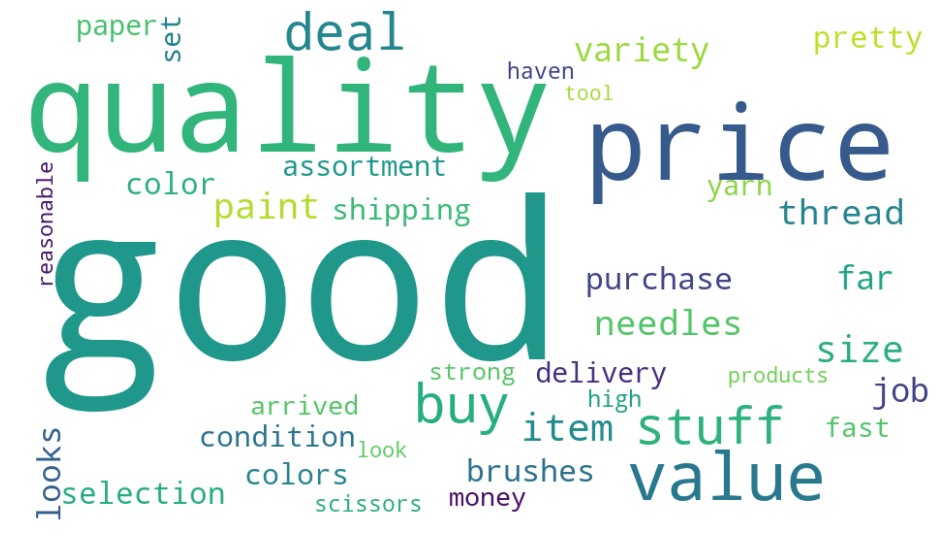

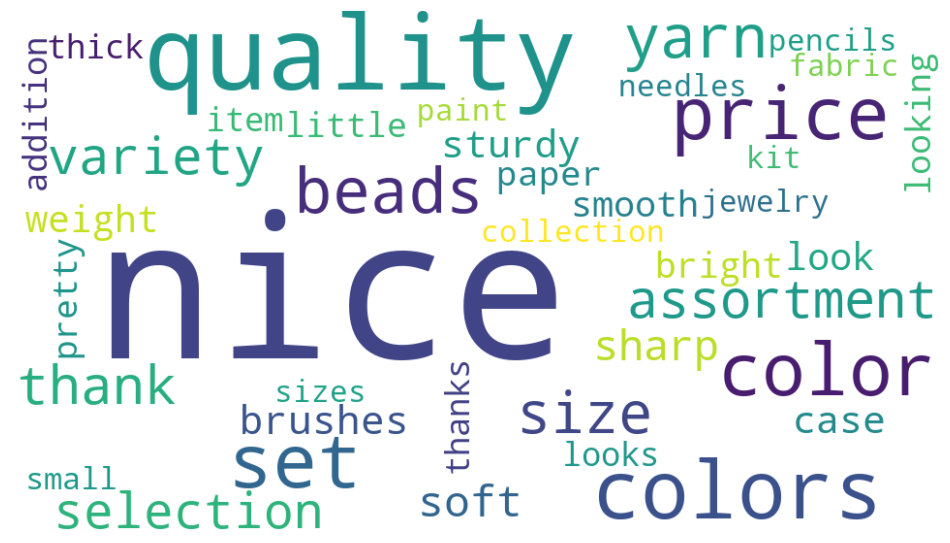

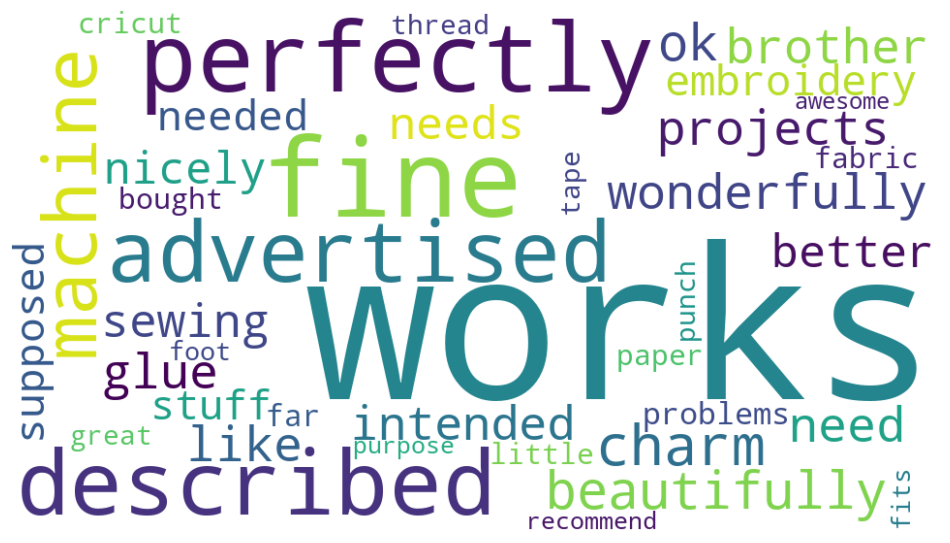

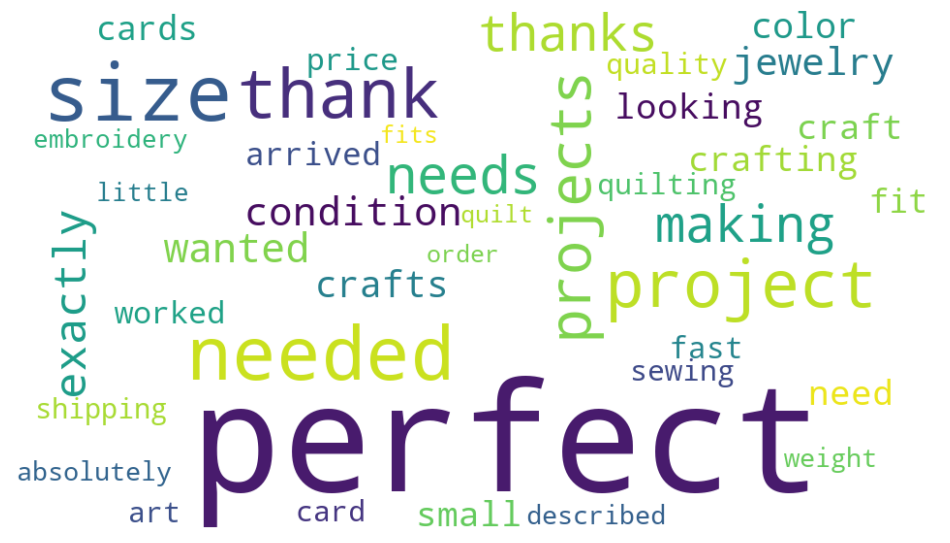

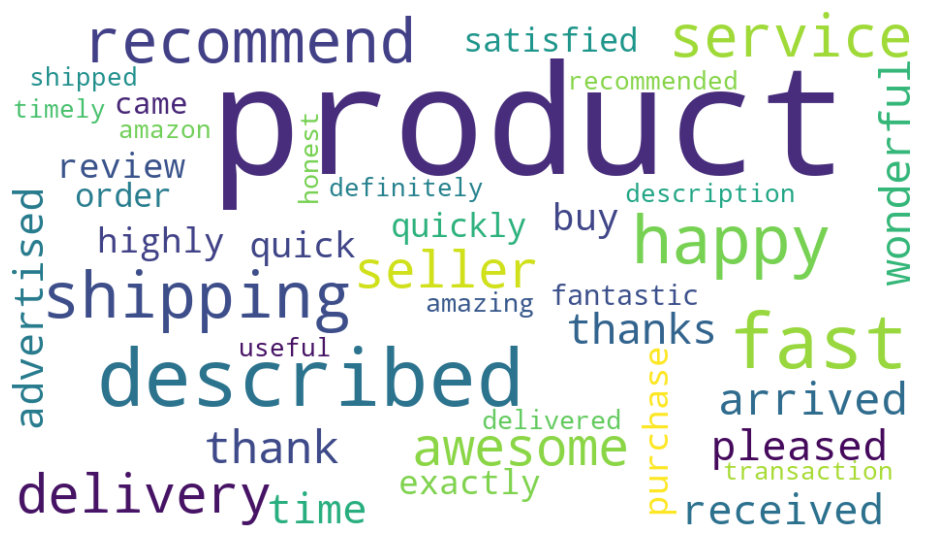

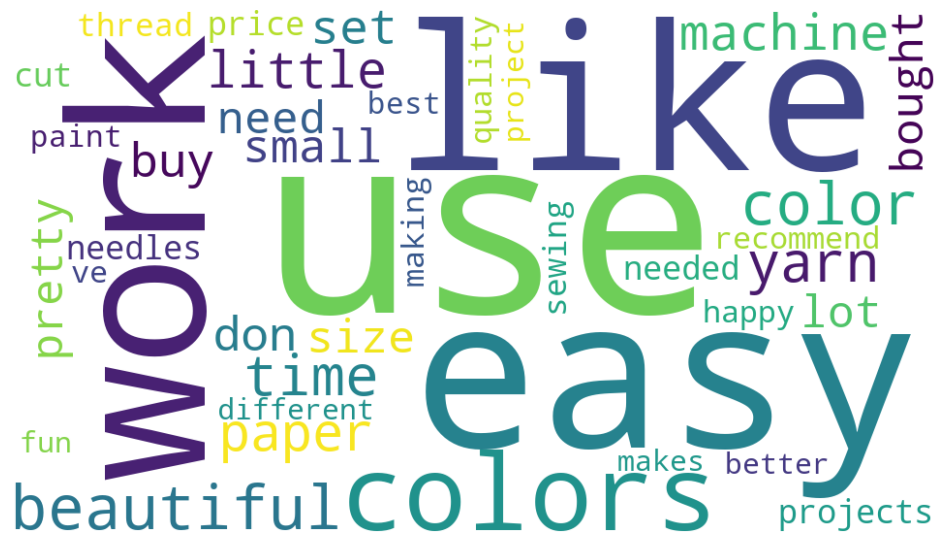

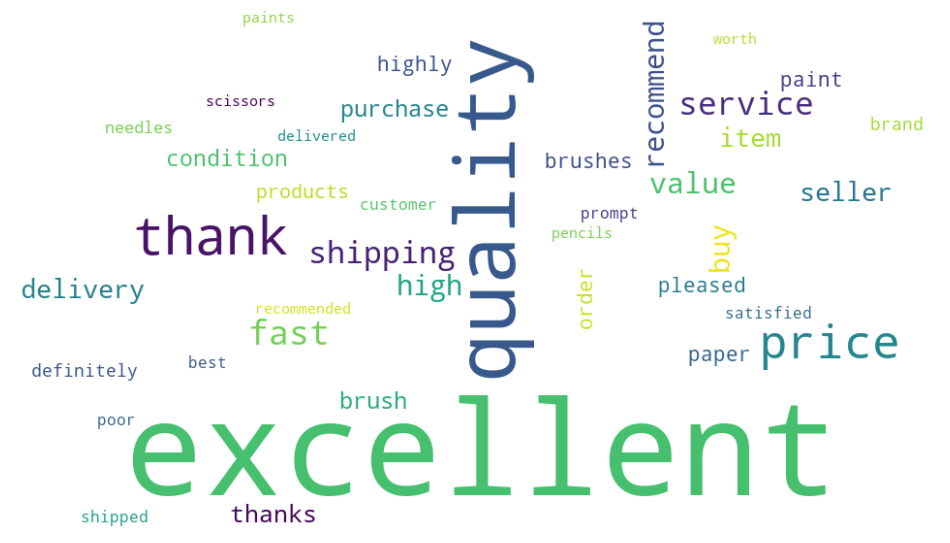

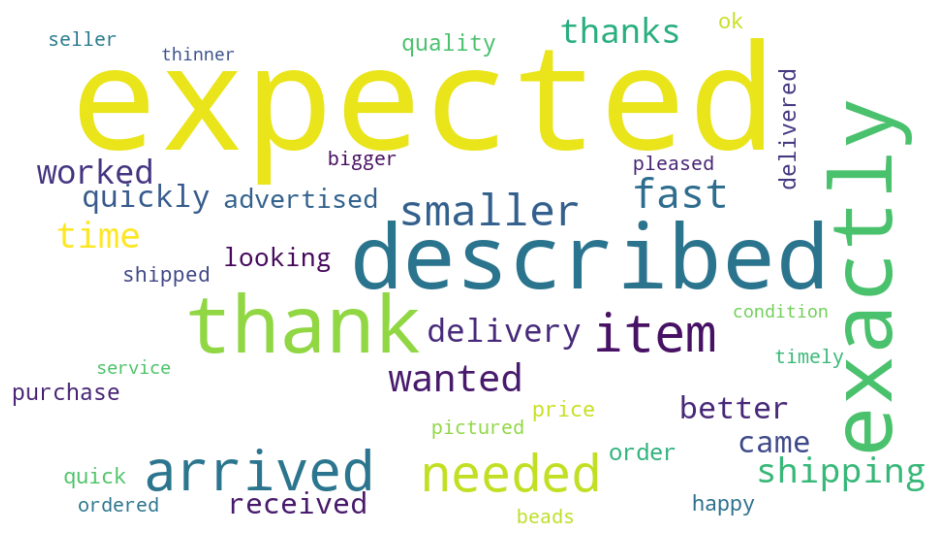

In [20]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


## LDA WORDCLOUD

THE FUNCTION `wordcloud_topics` IS CALLED TO GENERATE WORD CLOUDS FOR EACH TOPIC DERIVED FROM THE LDA (LATENT DIRICHLET ALLOCATION) TOPIC MODEL USING THE COUNT VECTORIZER'S FEATURE NAMES.

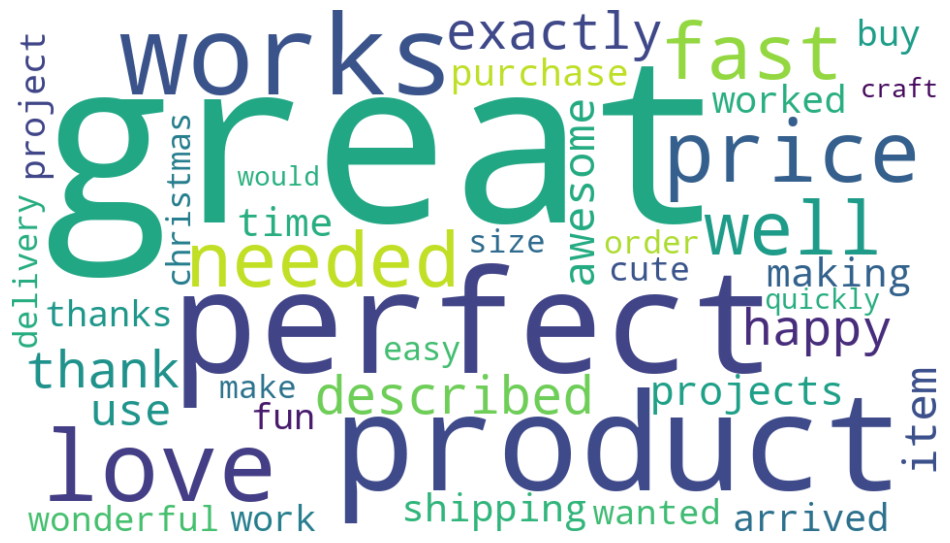

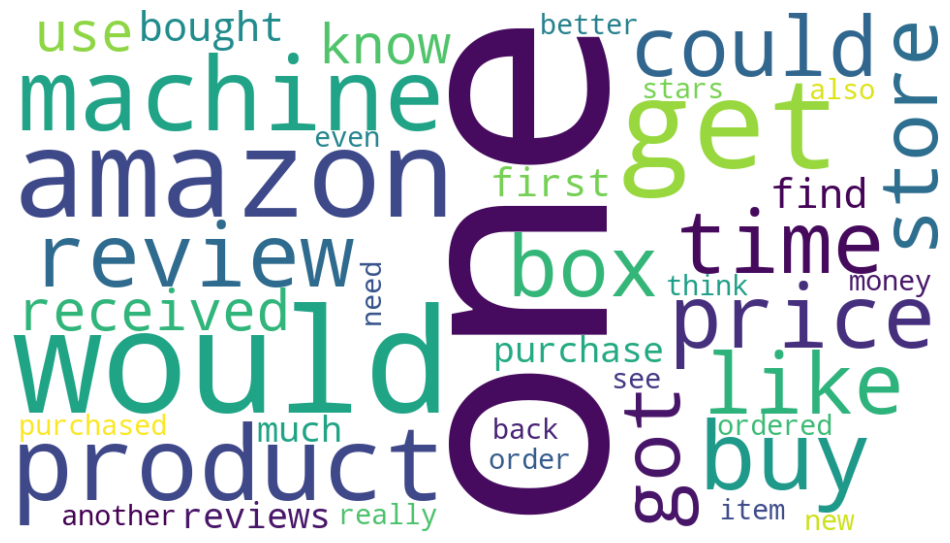

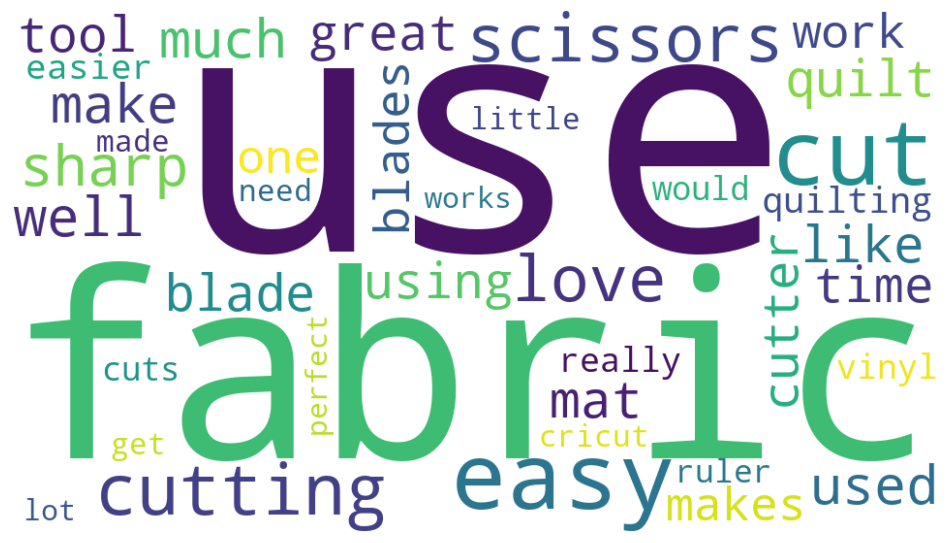

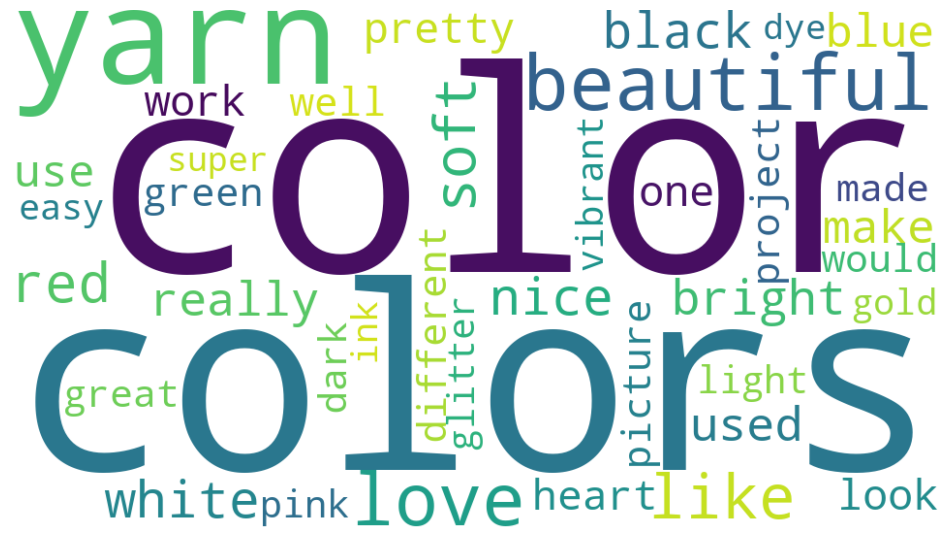

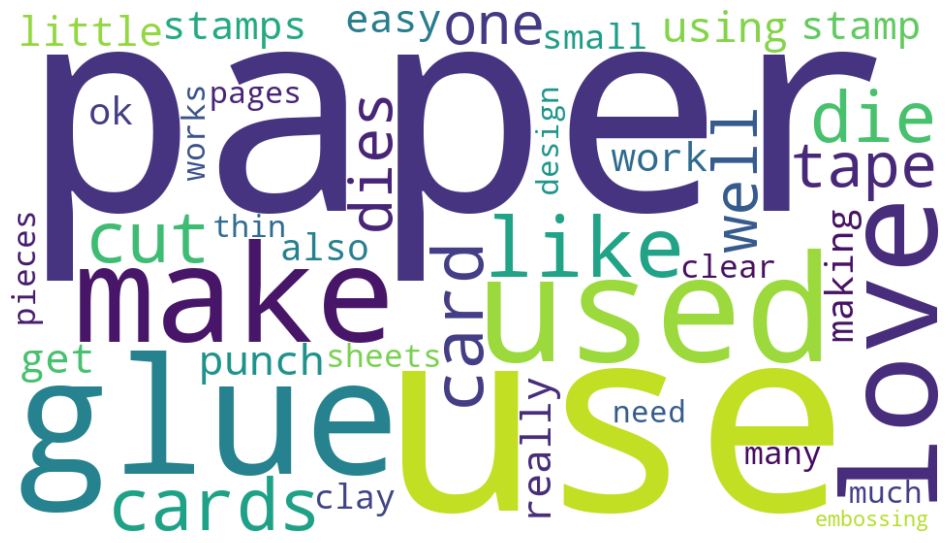

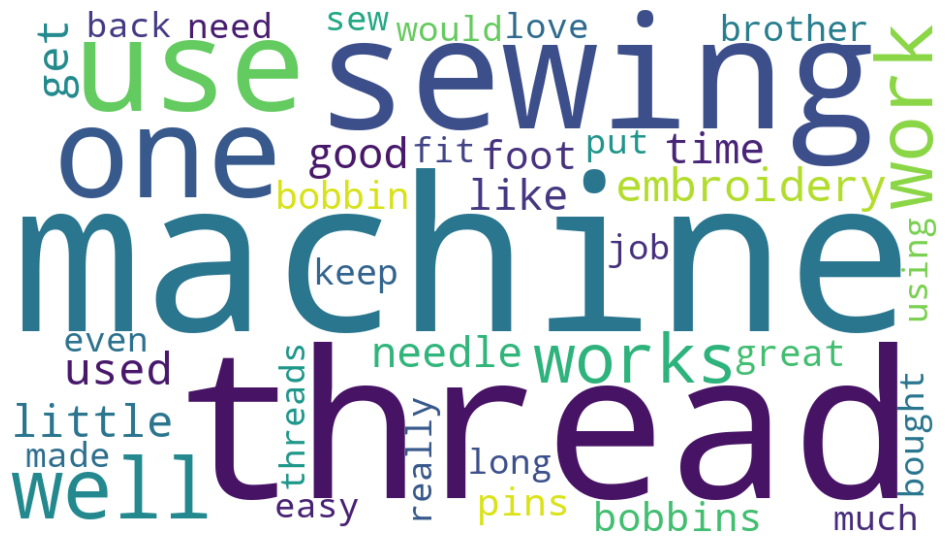

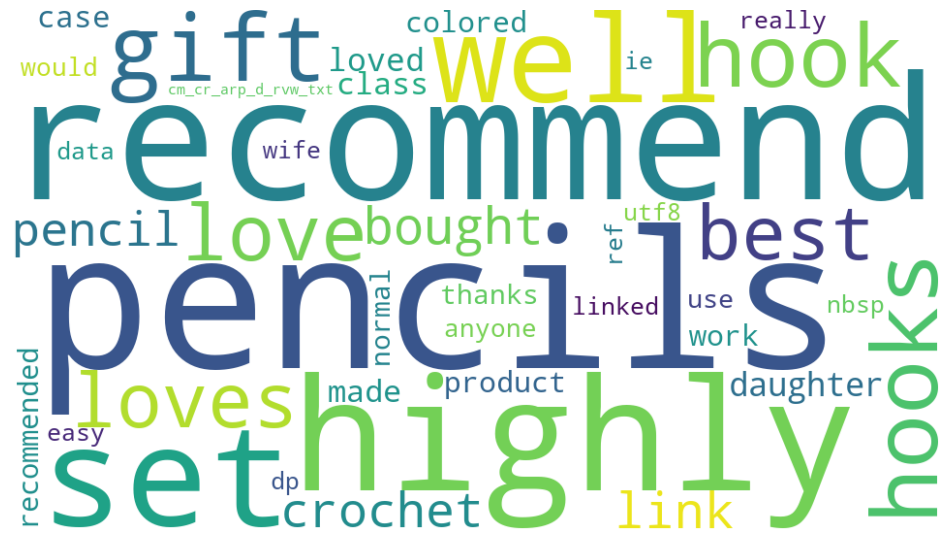

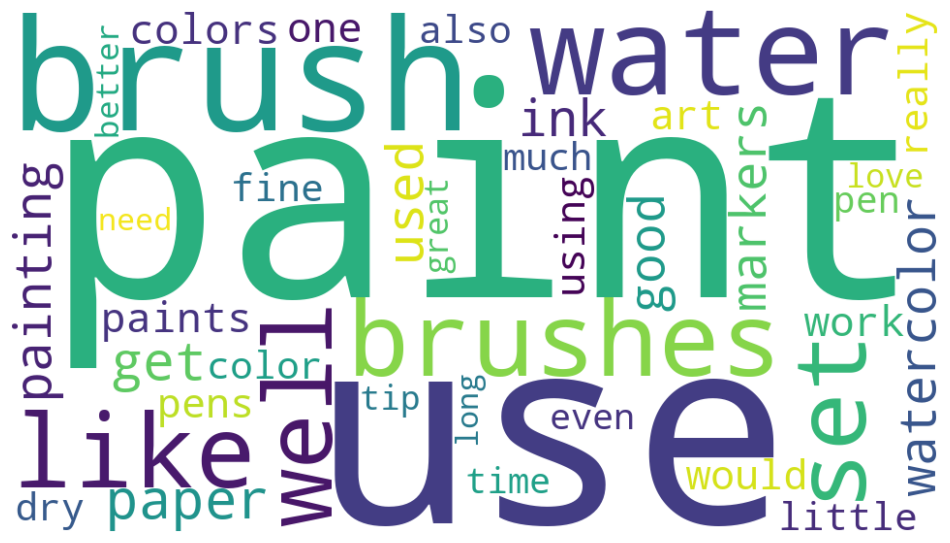

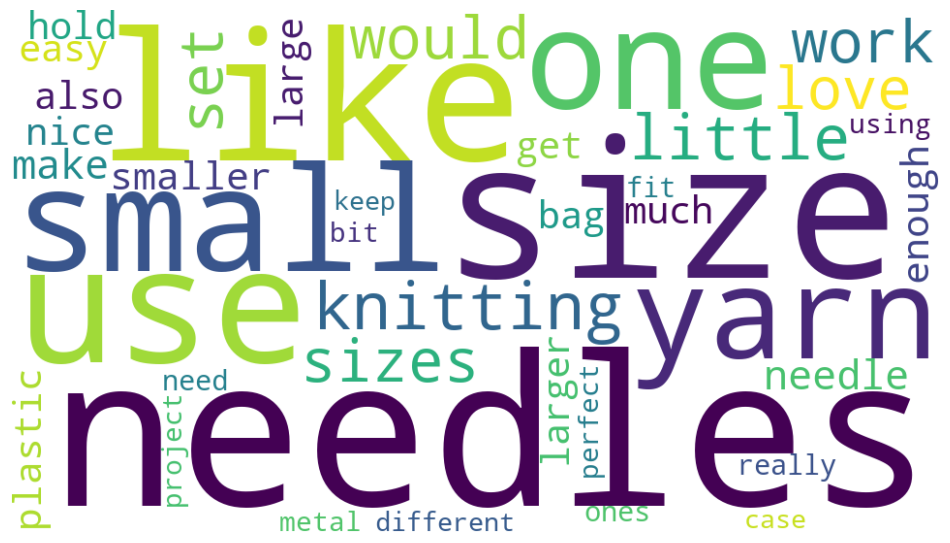

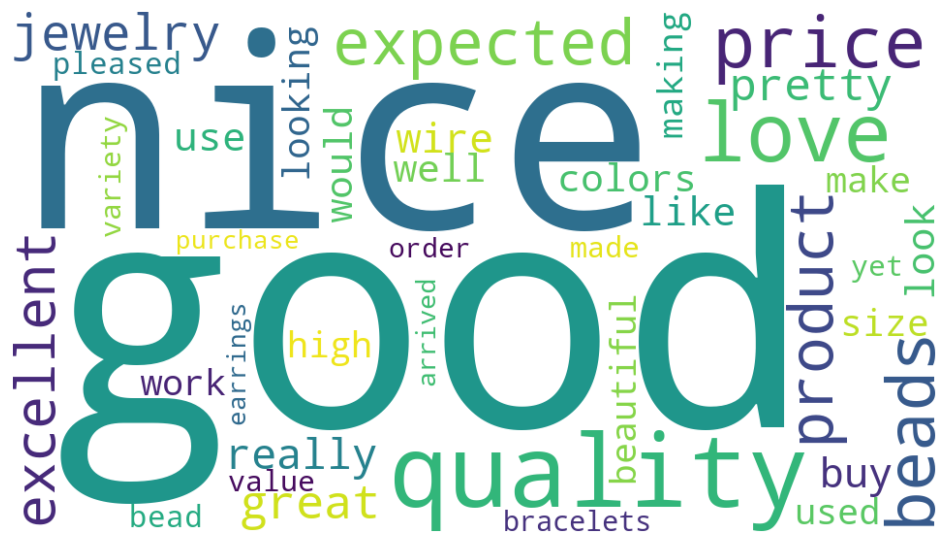

In [21]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


## TOPICS

In [22]:
topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)


## SEPERATE DATE BY YEAR

THE CODE ITERATES OVER UNIQUE YEARS IN THE DATASET AND CALCULATES THE TOPIC DISTRIBUTION FOR EACH YEAR USING NMF (NON-NEGATIVE MATRIX FACTORIZATION). THE RESULTING DATA, ALONG WITH THE CORRESPONDING YEAR, IS APPENDED TO `overall`. A PROGRESS BAR IS DISPLAYED USING `tqdm`.

In [23]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["overall"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["overall"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))


C:\Users\laxmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.31it/s]


## DRAWING TIMECHART

THE CODE CREATES A DATAFRAME `df_year` USING THE `year_data` LIST GENERATED IN THE PREVIOUS SNIPPET. THEN, IT PLOTS AN AREA CHART SHOWING THE TOPIC DISTRIBUTION OVER THE YEARS USING MATPLOTLIB.

<Axes: xlabel='overall'>

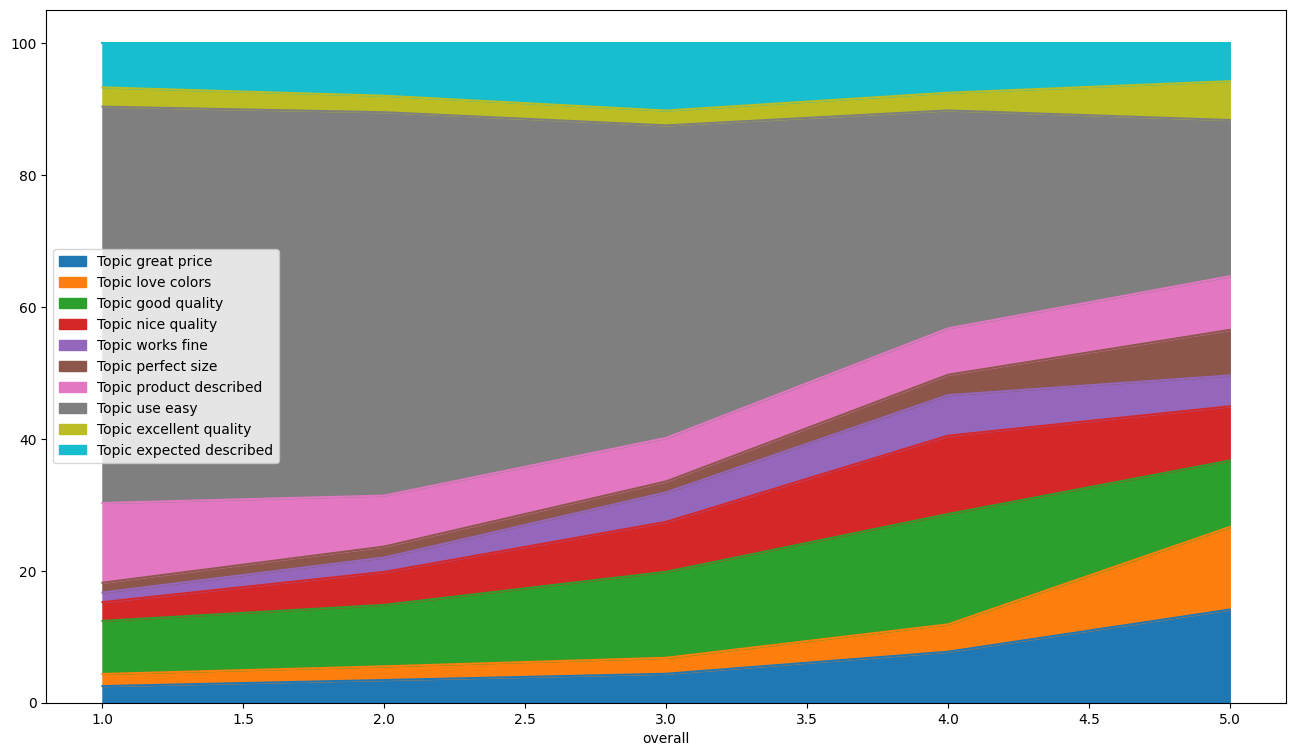

In [24]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["overall"] + topic_names).set_index("overall")
df_year.plot.area(figsize=(16,9))
